In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
import seaborn as sb
from matplotlib import font_manager as fm
from pandas import pivot_table

In [8]:
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=5
plt.rcParams['axes.unicode_minus']=False

In [3]:
origin=load_data('flights')
origin.head()

[data] https://data.hossam.kr/data/lab06/flights.xlsx
[desc] 어느 항공사의 년/월별 국제선 탑승객 수(출처: seaborn 내장 데이터)

field       description
----------  ----------------------------------
year        항공 승객 수가 집계된 연도
month       항공 승객 수가 집계된 월
passengers  해당 년도/월의 국제선 항공 승객 수



,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [4]:
df=origin.copy()
df['month']=df['month'].map({
    'January':1,'February':2,'March':3,'April':4,
    'May':5,'June':6,'July':7,'August':8,
    'September':9,'October':10,'November':11,'December':12
})

df.head()

,year,month,passengers
0,1949,1,112
1,1949,2,118
2,1949,3,132
3,1949,4,129
4,1949,5,121


In [6]:
df2=pivot_table(df,index='year',columns='month',values='passengers')
df2

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1949,112.0,118.0,132.0,129.0,121.0,135.0,148.0,148.0,136.0,119.0,104.0,118.0
1950,115.0,126.0,141.0,135.0,125.0,149.0,170.0,170.0,158.0,133.0,114.0,140.0
1951,145.0,150.0,178.0,163.0,172.0,178.0,199.0,199.0,184.0,162.0,146.0,166.0
1952,171.0,180.0,193.0,181.0,183.0,218.0,230.0,242.0,209.0,191.0,172.0,194.0
1953,196.0,196.0,236.0,235.0,229.0,243.0,264.0,272.0,237.0,211.0,180.0,201.0
1954,204.0,188.0,235.0,227.0,234.0,264.0,302.0,293.0,259.0,229.0,203.0,229.0
1955,242.0,233.0,267.0,269.0,270.0,315.0,364.0,347.0,312.0,274.0,237.0,278.0
1956,284.0,277.0,317.0,313.0,318.0,374.0,413.0,405.0,355.0,306.0,271.0,306.0
1957,315.0,301.0,356.0,348.0,355.0,422.0,465.0,467.0,404.0,347.0,305.0,336.0


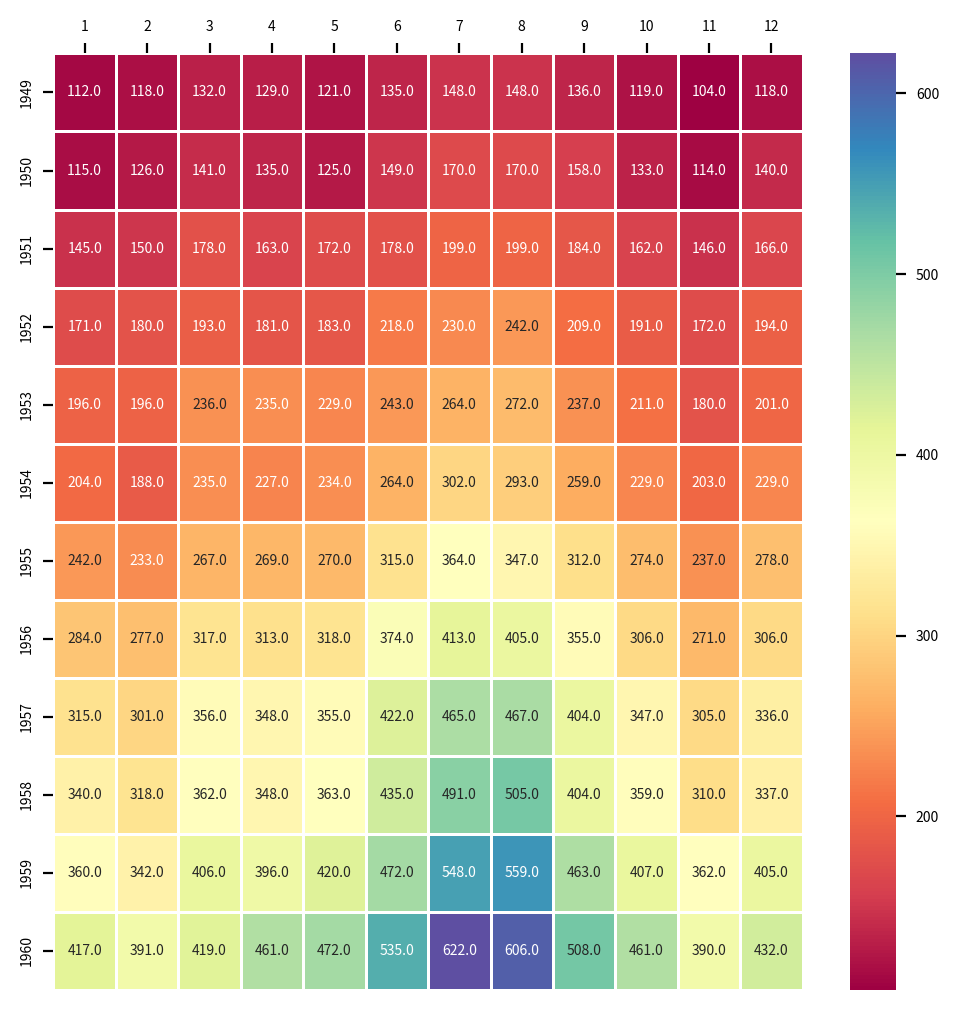

In [9]:
# 1. 그래프 초기화
width_px=1000
height_px=1000
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.heatmap(data=df2, annot=True, fmt='0.1f',linewidth=0.5,cmap='Spectral')

# 3. 그래프 꾸미기
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.tick_top()

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()